In [1]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
population_data = pd.read_csv(r"D:\projects\world popuation analysis\world_population.csv")


In [3]:
population_data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
print(population_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
print(population_data.describe())

             Rank  2022 Population  2020 Population  2015 Population  \
count  234.000000     2.340000e+02     2.340000e+02     2.340000e+02   
mean   117.500000     3.407441e+07     3.350107e+07     3.172996e+07   
std     67.694165     1.367664e+08     1.355899e+08     1.304050e+08   
min      1.000000     5.100000e+02     5.200000e+02     5.640000e+02   
25%     59.250000     4.197385e+05     4.152845e+05     4.046760e+05   
50%    117.500000     5.559944e+06     5.493074e+06     5.307400e+06   
75%    175.750000     2.247650e+07     2.144798e+07     1.973085e+07   
max    234.000000     1.425887e+09     1.424930e+09     1.393715e+09   

       2010 Population  2000 Population  1990 Population  1980 Population  \
count     2.340000e+02     2.340000e+02     2.340000e+02     2.340000e+02   
mean      2.984524e+07     2.626947e+07     2.271022e+07     1.898462e+07   
std       1.242185e+08     1.116982e+08     9.783217e+07     8.178519e+07   
min       5.960000e+02     6.510000e+02    

In [6]:
print(population_data.isnull().sum())

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [7]:
population_data_cleaned = population_data.drop(columns=['Rank', 'CCA3', 'Capital'])

# Visualizations

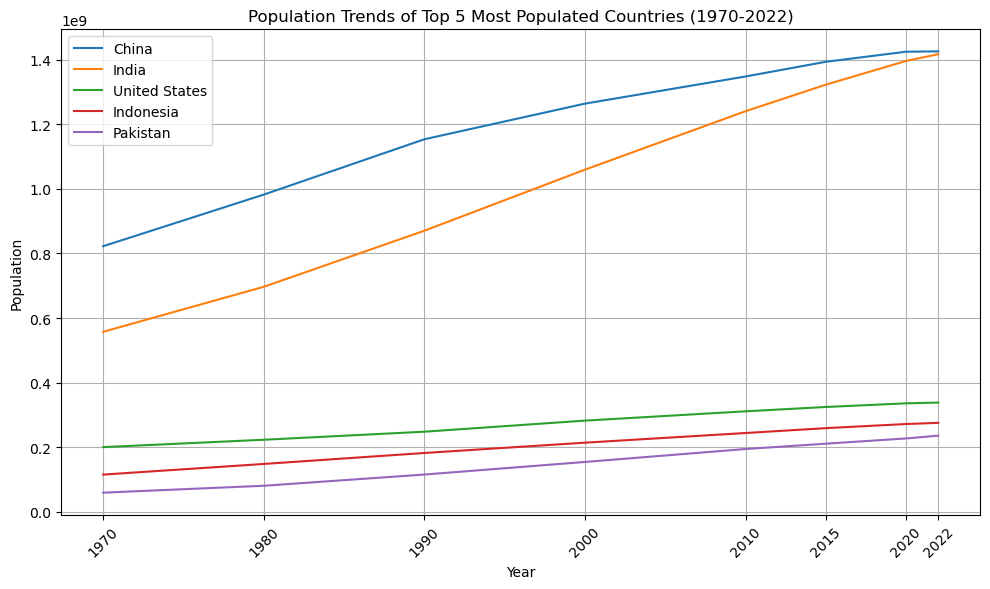

In [9]:
# Population Trends of Top 5 Most Populated Countries
population_years = ['2022 Population', '2020 Population', '2015 Population', 
                    '2010 Population', '2000 Population', '1990 Population', 
                    '1980 Population', '1970 Population']
years = [2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970]

top_countries = population_data_cleaned[['Country/Territory'] + population_years].sort_values(by='2022 Population', ascending=False).head(5)

# Plot population trends for top 5 countries
plt.figure(figsize=(10, 6))
for i, row in top_countries.iterrows():
    plt.plot(years, row[population_years], label=row['Country/Territory'])
plt.title('Population Trends of Top 5 Most Populated Countries (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

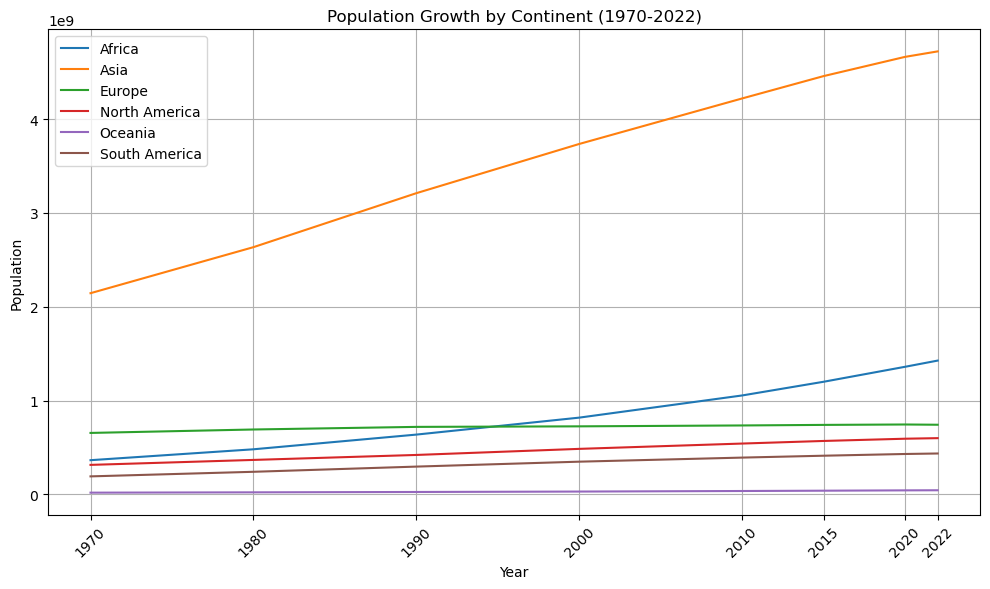

In [10]:
# Population Growth by Continent
continent_pop = population_data_cleaned.groupby('Continent')[population_years].sum()

plt.figure(figsize=(10, 6))
for continent in continent_pop.index:
    plt.plot(years, continent_pop.loc[continent, population_years], label=continent)
plt.title('Population Growth by Continent (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

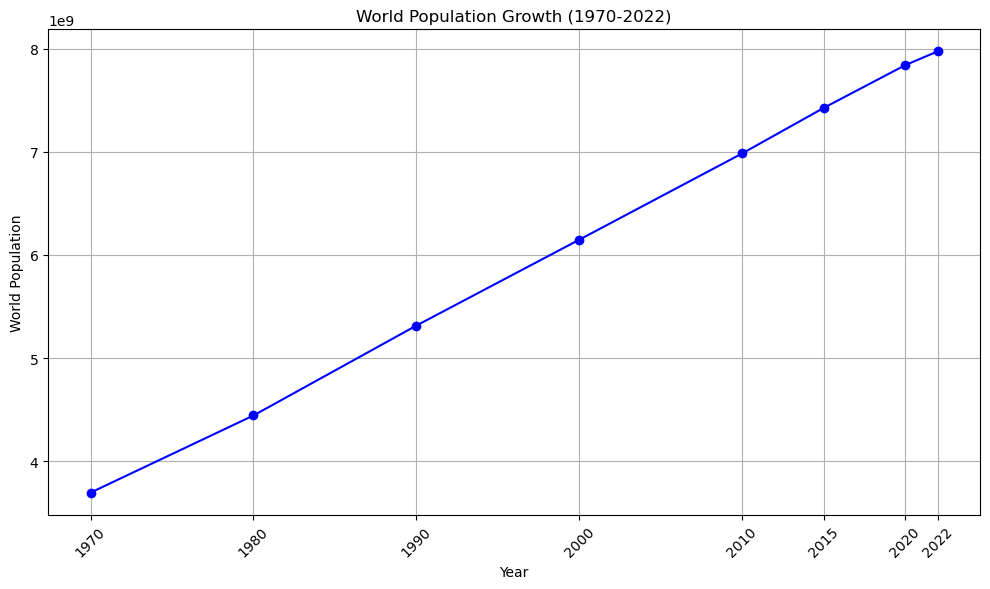

In [11]:
# World Population Growth Over Time
world_population = population_data_cleaned[population_years].sum()

plt.figure(figsize=(10, 6))
plt.plot(years, world_population, marker='o', color='b', linestyle='-')
plt.title('World Population Growth (1970-2022)')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

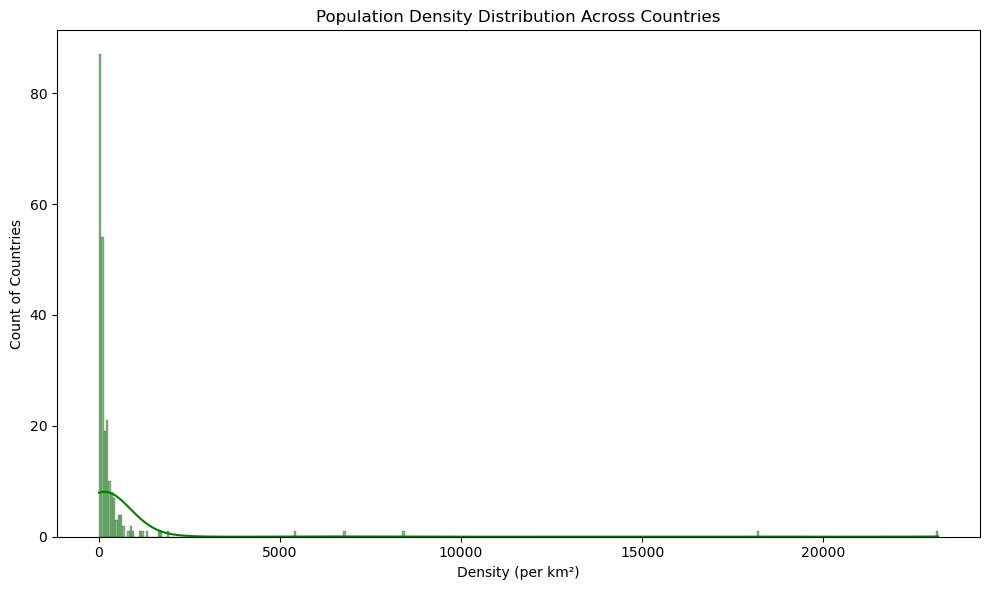

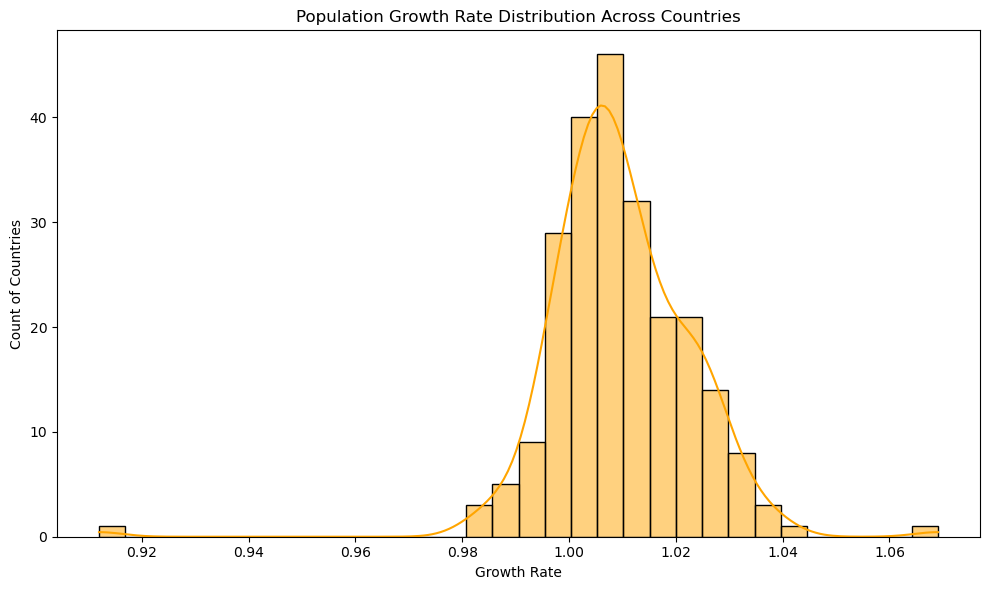

In [12]:
# Population Density Comparison
plt.figure(figsize=(10, 6))
sns.histplot(population_data_cleaned['Density (per km²)'], kde=True, color='g')
plt.title('Population Density Distribution Across Countries')
plt.xlabel('Density (per km²)')
plt.ylabel('Count of Countries')
plt.tight_layout()
plt.show()

# 4.5 Population Growth Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(population_data_cleaned['Growth Rate'], kde=True, color='orange')
plt.title('Population Growth Rate Distribution Across Countries')
plt.xlabel('Growth Rate')
plt.ylabel('Count of Countries')
plt.tight_layout()
plt.show()

# Prediction Model

In [14]:
# prediction using world population 
X = np.array(years).reshape(-1, 1)  # Years as the input (independent variable)
y = world_population.values  # Population as the target (dependent variable)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict population for future years (up to 2050)
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)
predicted_population = model.predict(future_years)

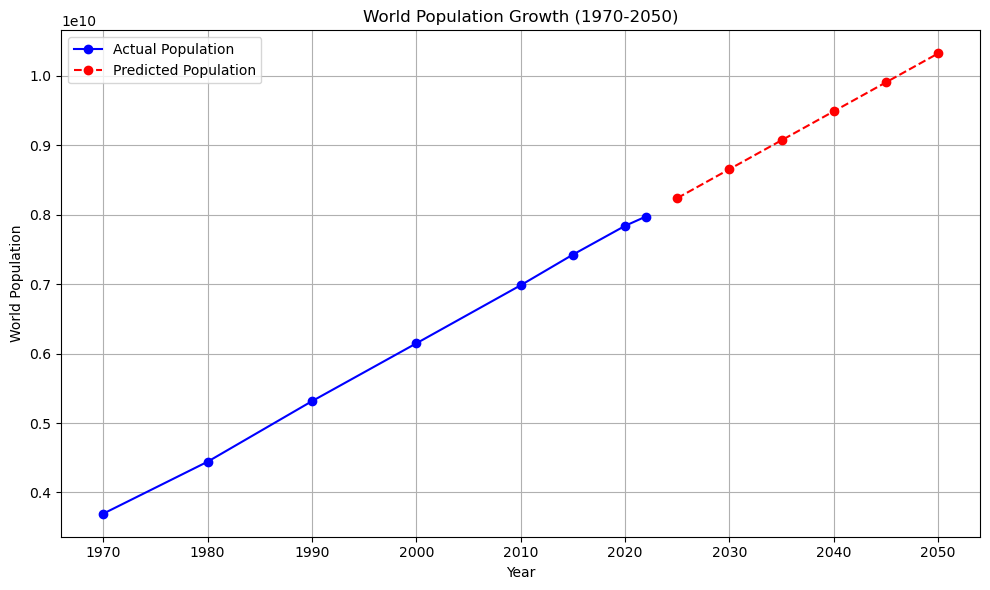

In [15]:
# Ploting actual world population and future predictions
plt.figure(figsize=(10, 6))
plt.plot(years, world_population, marker='o', color='b', label='Actual Population')
plt.plot(future_years.flatten(), predicted_population, marker='o', color='r', linestyle='--', label='Predicted Population')
plt.title('World Population Growth (1970-2050)')
plt.xlabel('Year')
plt.ylabel('World Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Printing the predicted future population
print("\nPredicted Population for Future Years:")
for year, pop in zip(future_years.flatten(), predicted_population):
    print(f"{year}: {int(pop)}")


Predicted Population for Future Years:
2025: 8238706813
2030: 8655562039
2035: 9072417264
2040: 9489272490
2045: 9906127715
2050: 10322982941
